In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()
image_paths = list(uploaded.keys())

assert len(image_paths) == 2, "Upload exactly TWO images"


Saving WhatsApp Image 2026-01-02 at 10.13.09 PM (3).jpeg to WhatsApp Image 2026-01-02 at 10.13.09 PM (3).jpeg
Saving WhatsApp Image 2026-01-02 at 10.13.09 PM (4).jpeg to WhatsApp Image 2026-01-02 at 10.13.09 PM (4).jpeg


In [3]:
def load_luminance(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) / 255.0

    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    return 0.2126*R + 0.7152*G + 0.0722*B


def gradient_covariance_score(path):
    L = load_luminance(path)

    Gx = cv2.Sobel(L, cv2.CV_32F, 1, 0, ksize=3)
    Gy = cv2.Sobel(L, cv2.CV_32F, 0, 1, ksize=3)

    M = np.stack([Gx.flatten(), Gy.flatten()], axis=1)

    C = np.cov(M, rowvar=False)
    eigenvalues = np.linalg.eigvalsh(C)

    # CORE SCORE
    score = eigenvalues[1] / (eigenvalues[0] + 1e-8)
    return score


In [4]:
scores = {}

for path in image_paths:
    scores[path] = gradient_covariance_score(path)
    print(f"{path} → Gradient Score: {scores[path]:.4f}")


WhatsApp Image 2026-01-02 at 10.13.09 PM (3).jpeg → Gradient Score: 1.2472
WhatsApp Image 2026-01-02 at 10.13.09 PM (4).jpeg → Gradient Score: 1.1055


In [5]:
real_image = max(scores, key=scores.get)
fake_image = min(scores, key=scores.get)

print("\n🧠 DETECTION RESULT")
print(f"📸 REAL IMAGE → {real_image}")
print(f"🤖 AI-GENERATED IMAGE → {fake_image}")



🧠 DETECTION RESULT
📸 REAL IMAGE → WhatsApp Image 2026-01-02 at 10.13.09 PM (3).jpeg
🤖 AI-GENERATED IMAGE → WhatsApp Image 2026-01-02 at 10.13.09 PM (4).jpeg


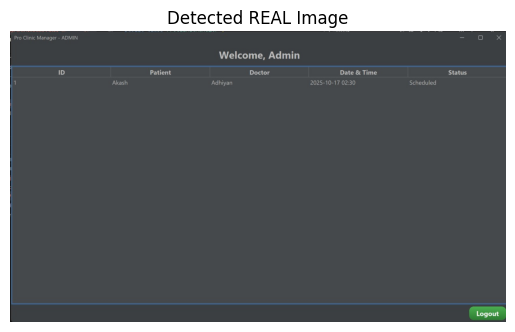

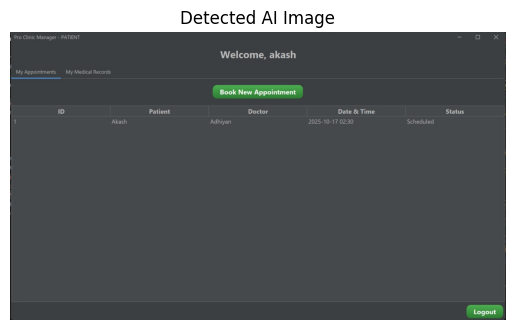

In [6]:
def show(img_path, title):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.title(title)
    plt.show()

show(real_image, "Detected REAL Image")
show(fake_image, "Detected AI Image")
